<a href="https://colab.research.google.com/github/EmYassir/rl_optimal_control/blob/main/inventory_management_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inventory management problem


In this notebook, we are going to implement the solution of a classic problem inspired from Puterman's book: the inventory management problem. We first present a theorization of the problem, and which categorizes as a *Finite Horizon Undiscounted Markov Decision Process*. Then, we will describe the equations leading to solutions. Finally, we are going to run an experiment on a numerical example taken from Puterman's book (section 3) to validate the theoretical findings.

## Problem definition

### Stochastic inventory mangement
Inventory Optimization is a task of maximizing revenue by taking into account the capital investment, warehouse capacity, supply and demand of stock, leadtime and backordering of stocks. This problem has been well researched and is usually presented in form of a Markov Decision Process (MDP). 

Each month, the manager of a warehouse determines current inventory (stock on hand) of a single product. Based on this information, he decides whether or not to order additional stock from a supplier. In doing so, he is faced with a tradeoff between the costs associated with keeping inventory and the lost sales or penalties associated with being unable to satisfy customer demand for the product. The manager's objective is to maximize some measure of profit (sales revenue less inventory holding and ordering costs) over the decision-making horizon. Demand for
the product is random with a known probability distribution (source: Puterman - section 3.2.1):


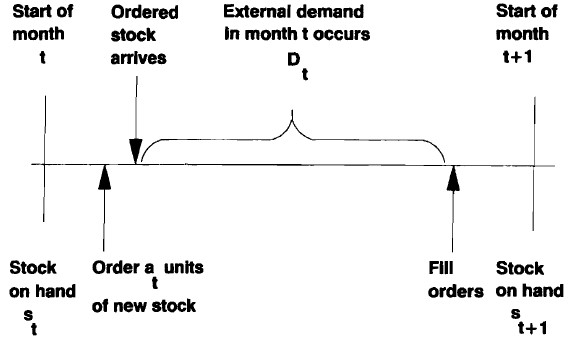


We formulate a model under the following set of simplifying assumptions:
1. The decision to order additional stock is made at the beginning of each month and delivery occurs instantaneously.
2. Demand for the product arrives throughout the month but all orders are filled on the last day of the month.
3. If demand exceeds inventory, the excess demand is lost and there is no backlogging of unfilled orders.
4. The revenues, costs, and the demand distribution do not vary from month to month.
5. The product is sold only in whole units.
6. The warehouse has capacity of M units.

$M$ represents the maximum capacity of the inventory,  the demand is i.i.d. with given distribution:
\begin{equation*}
\mathbb{P}(d_{t} = j) = p_{j},\,\,\text{for}\,\,j = 1, 2\dots
\end{equation*}

For time steps $t = 1, 2, \dots$, let $s_t$ denote the inventory level, $a_t$ the order size, and $d_t$ the demand at time $t$ (everything is integer-valued). The inventory level from one time step to the next follows this dynamics:
\begin{align*}
s_{t} = max\{s_{t}+a_{t}-d_{t}, 0\}
\end{align*}
Because backlogging is not permitted, the inventory level cannot be negative. Thus whenever $s_{t}+a_{t}-d_{t} < 0$, the inventory level at the subsequent decision epoch is $0$. 

We now describe the economic parameters of this model. We express them as values at the start of the month so that we are implicitly considering the time value of money when defining these quantities. The present value of the cost of ordering u units in any month is $O(u)$. We assume it is composed of a fixed cost $K > 0$ for placing orders and a variable cost $c(u)$ that increases with quantity ordered. Hence:
\begin{equation*}
O(u) =
\begin{cases}
K + c(u),\,\,\text{if}\,\,u \geq 0\\
0,\,\,\text{if}\,\,u = 0\\
\end{cases}
\end{equation*}
The reward at time $t$ can be formulated as:
\begin{equation*}
\begin{cases}
r_{s_{t}, a_{t}} = \underbrace{F(s_{t} + a_{t})}_{\text{present value of the inventory}} - \underbrace{O(a_{t})}_{\text{order cost}} - \underbrace{h(s_{t} + a_{t})}_{\text{holding cost}},\,\,\text{for}\,\,t=1,\dots,N\\
r_{s_{N}, a_{N}} = \underbrace{g(s_{N}, a_{N})}_{\text{salvage value}}
\end{cases}
\end{equation*}
The expected value of the inventory is:
\begin{equation*}
F(u) = \sum_{j=0}^{u-1} \underbrace{f(j)}_{\text{revenue from }j\text{ sales}} p_{j} + \sum_{j \geq u} \underbrace{f(u)}_{\text{revenue caped to }u\text{ sales}}p_{j},\,\,\text{for}\,\,z=0, 1\dots
\end{equation*}


### MDP formulation:

We can describe the stochastic inventory management problem as MDP. The inputs are 

*   Holding cost $h$, order cost $O$, sales revenue $f$, salvage revenue $g$.
*   Demand probabilities: $p_{0}, p_{1},\dots$
*   Time horizon: $ \{1, 2,\dots, N\} $
*   State space: $S = \{0, 1,\dots, M\}$
*   Actions space: $A = \{0, 1,\dots, M\}$
*   Expected rewards: $\{r_{1}, r_{2},\dots, r_{N}\}$
*   State transition probabilities: 
\begin{equation*}
P(s'|s, a) = \begin{cases}
0\,\,\text{if}\,\,s' \in (s+a, M]\\
p_{s+a-s'}\,\,\text{if}\,\,s' \in (0, s+a]\,\,\text{and}\,\,s+a \leq M\\
\sum_{k>s+a} p_{k}\,\,\text{if}\,\,s' = 0\,\,\text{and}\,\,s+a \leq M\\
\end{cases}
\end{equation*}

This is the probability of having an inventory level $s'$ at the next time step when the inventory level at the current time step is $s$ and we order $a$ units of inventory.

The output is a optimal sequence of policies $\sigma_{1}, \sigma_{2}, \dots, \sigma_{N}$. These
policies are used to pick the optimal action to take at each time step.

### Solving fi
nite-horizon MDP by backward induction:
in order to find the policies $\sigma_{1}, \sigma_{2}, \dots, \sigma_{N}$, we are going to use a method of dynamic programming called *backward induction*. The algorithm is the following:
1.   Given $N$ and the values $g(s),\,\,s\in S$, set $V_{N}(s) = g(s),\,\,\forall s \in S$.
2.   For $t = N-1, N-2, \dots, 1$:
    *     For $s \in S$, compute:
    \begin{align*}
    V_{t}(s) &= \underset{a \in A}{\mathrm{max}}\{r_{j}(s,a)+\sum_{s'\in S}P(s'|s,a)V_{t+1}(s)\}\\
\sigma_{t}(s) &= \underset{a \in A}{\mathrm{argmax}}\{r_{j}(s,a)+\sum_{s'\in S}P(s'|s,a)V_{t+1}(s)\}
    \end{align*}


According to Puterman(4.3), the policies $\sigma_{1}, \sigma_{2}, \dots, \sigma_{N}$ are optimal.

## Numerical example

We will use the same numerical example given in the Puterman book (Section 3.2.2). We choose $K = 4$, $c(u) = 2u$, $g(u) = 0$, $h(u) = u$, $M = 3$, $N = 3$ and $f(u) = 8u$. The probabilities $p_{j}$ are:
\begin{equation*}
p_{j} = \begin{cases}
\frac{1}{4}\,\,\text{if}\,\,j = 0\\
\frac{1}{2}\,\,\text{if}\,\,j = 1\\
\frac{1}{4}\,\,\text{if}\,\,j = 2\\
\end{cases}
\end{equation*}
The expected revenue $F$ when $u$ units of stock are on hand prior to receipt of an order is described in the table below (source: Puterman - Section 3.2.2):


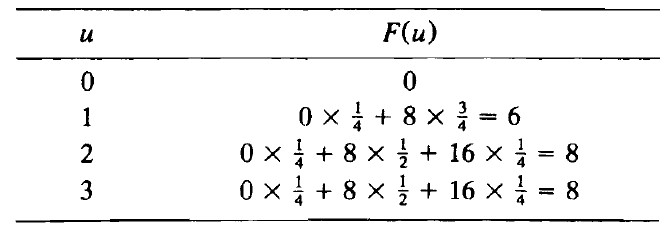



The tables below describe the reward and the transition matrix (source: Puterman - Section 3.2.2):


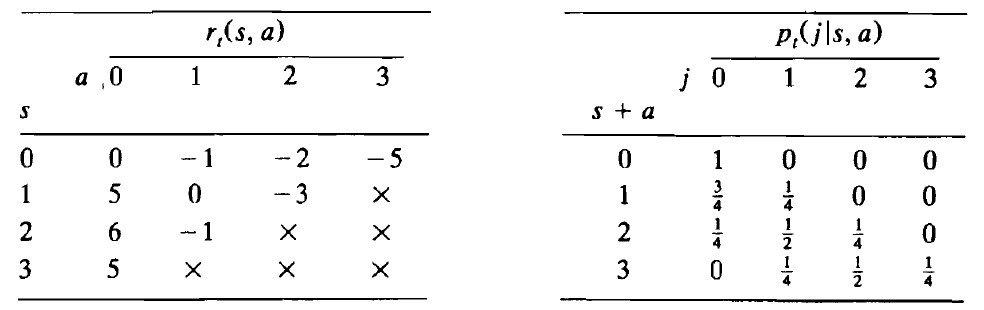


The policies we should get should be of the form:
\begin{equation*}
d_{t}(s) = \begin{cases}
\Sigma - s\,\,\text{if}\,\,s < \sigma\\
0\,\,\text{if}\,\,s \geq \sigma
\end{cases}
\end{equation*}
In this particular example $\sigma = 0$ and $\Sigma = M$. 

## Code

In [ ]:
import numpy as np
import numpy.ma as ma

The function below generates both of the reward $(|S|\times|A|)$ and transition $(|A|\times|S|\times|S|)$ matrices. It also generates a uniform policy matrix $(|S|\times|A|)$ adapted to the problem. 

In [ ]:
def generate_mdp():
  """
  This function is only used to generate the MDP described in the puterman book
  """
  R = np.array([[0, -1, -2, -5], [5, 0, -3, 0], [6, -1, 0, 0], [5, 0, 0, 0]])
  R = ma.masked_array(R, mask=[[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 1], [0, 1, 1, 1]], fill_value = -9999)

  # Uniform policy: S x A
  U = np.ones((4, 4))
  U = ma.masked_array (U, mask=[[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 1], [0, 1, 1, 1]], fill_value = -9999)
  for i in range(U.shape[0]):
    U[i,:] = 1/(4 - i) * U[i,:]

  # A x S x T
  P = np.ones((4, 4, 4)) * -1.

  # T = 0
  P[0, 0, 0] = 1.  # P(t = 0 | s = 0, a = 0) = 1

  P[1, 0, 0] = 3/4 # P(t = 0 | s = 0, a = 1) = 3/4
  P[0, 1, 0] = 3/4 # P(t = 0 | s = 1, a = 0) = 3/4

  P[2, 0, 0] = 1/4 # P(t = 0 | s = 0, a = 2) = 1/4
  P[1, 1, 0] = 1/4 # P(t = 0 | s = 1, a = 1) = 1/4
  P[0, 2, 0] = 1/4 # P(t = 0 | s = 2, a = 0) = 1/4

  P[3, 0, 0] = 0.  # P(t = 0 | s = 0, a = 3) = 0
  P[2, 1, 0] = 0.  # P(t = 0 | s = 1, a = 2) = 0
  P[1, 2, 0] = 0.  # P(t = 0 | s = 2, a = 1) = 0
  P[0, 3, 0] = 0.  # P(t = 0 | s = 3, a = 0) = 0

  # T = 1
  P[0, 0, 1] = 0.  # P(t = 1 | s = 0, a = 0) = 0

  P[1, 0, 1] = 1/4 # P(t = 1 | s = 0, a = 1) = 1/4
  P[0, 1, 1] = 1/4 # P(t = 1 | s = 1, a = 0) = 1/4

  P[2, 0, 1] = 1/2 # P(t = 1 | s = 0, a = 2) = 1/2
  P[1, 1, 1] = 1/2 # P(t = 1 | s = 1, a = 1) = 1/2
  P[0, 2, 1] = 1/2 # P(t = 1 | s = 2, a = 0) = 1/2

  P[3, 0, 1] = 1/4  # P(t = 1 | s = 0, a = 3) = 1/4
  P[2, 1, 1] = 1/4  # P(t = 1 | s = 1, a = 2) = 1/4
  P[1, 2, 1] = 1/4  # P(t = 1 | s = 2, a = 1) = 1/4
  P[0, 3, 1] = 1/4  # P(t = 1 | s = 3, a = 0) = 1/4

  # T = 2
  P[0, 0, 2] = 0.  # P(t = 2 | s = 0, a = 0) = 0

  P[1, 0, 2] = 0.  # P(t = 2 | s = 0, a = 1) = 0
  P[0, 1, 2] = 0.  # P(t = 2 | s = 1, a = 0) = 0

  P[2, 0, 2] = 1/4 # P(t = 2 | s = 0, a = 2) = 1/4
  P[1, 1, 2] = 1/4 # P(t = 2 | s = 1, a = 1) = 1/4
  P[0, 2, 2] = 1/4 # P(t = 2 | s = 2, a = 0) = 1/4

  P[3, 0, 2] = 1/2  # P(t = 2 | s = 0, a = 3) = 1/2
  P[2, 1, 2] = 1/2  # P(t = 2 | s = 1, a = 2) = 1/2
  P[1, 2, 2] = 1/2  # P(t = 2 | s = 2, a = 1) = 1/2
  P[0, 3, 2] = 1/2  # P(t = 2 | s = 3, a = 0) = 1/2

  # T = 3
  P[0, 0, 3] = 0.  # P(t = 3 | s = 0, a = 0) = 0

  P[1, 0, 3] = 0.  # P(t = 3 | s = 0, a = 1) = 0
  P[0, 1, 3] = 0.  # P(t = 3 | s = 1, a = 0) = 0

  P[2, 0, 3] = 0. # P(t = 3 | s = 0, a = 2) = 0
  P[1, 1, 3] = 0. # P(t = 3 | s = 1, a = 1) = 0
  P[0, 2, 3] = 0. # P(t = 3 | s = 2, a = 0) = 0

  P[3, 0, 3] = 1/4  # P(t = 3 | s = 0, a = 3) = 1/4
  P[2, 1, 3] = 1/4  # P(t = 3 | s = 1, a = 2) = 1/4
  P[1, 2, 3] = 1/4  # P(t = 3 | s = 2, a = 1) = 1/4
  P[0, 3, 3] = 1/4  # P(t = 3 | s = 3, a = 0) = 1/4 

  P = ma.masked_array(P, mask=(P == -1.))
  return P, R, U

We are going to use some functions from homework 1 that we will slightly adapt. This one takes an operator as in put and performs $N$ iterations:

In [ ]:
def iterate(init_guess, operator=lambda x: x, N = 3):
    trace_back = [] 
    curr = init_guess
    trace_back.append((None, curr))
    for i in range(N-1):
      pol, curr = operator(curr)
      if trace_back is not None:
        trace_back.append((pol, curr))
    return trace_back

We are going to use the undiscounted Bellman optimality operator:

In [ ]:
def get_bellman_optimality_operator(P, R):
  def operator(v):
    Q =  R + np.einsum('ast,t->sa', P, v)
    p = np.zeros(R.shape)
    p[np.arange(len(p)), ma.argmax(Q, axis = 1)] = 1.
    V = np.max(Q, axis = 1)
    return p, V
  return operator

We have masked the infeasible actions in the transition matrix: 

In [ ]:
P, R, policy = generate_mdp()
P

masked_array(
  data=[[[1.0, 0.0, 0.0, 0.0],
         [0.75, 0.25, 0.0, 0.0],
         [0.25, 0.5, 0.25, 0.0],
         [0.0, 0.25, 0.5, 0.25]],

        [[0.75, 0.25, 0.0, 0.0],
         [0.25, 0.5, 0.25, 0.0],
         [0.0, 0.25, 0.5, 0.25],
         [--, --, --, --]],

        [[0.25, 0.5, 0.25, 0.0],
         [0.0, 0.25, 0.5, 0.25],
         [--, --, --, --],
         [--, --, --, --]],

        [[0.0, 0.25, 0.5, 0.25],
         [--, --, --, --],
         [--, --, --, --],
         [--, --, --, --]]],
  mask=[[[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False],
         [False, False, False, False]],

        [[False, False, False, False],
         [False, False, False, False],
         [False, False, False, False],
         [ True,  True,  True,  True]],

        [[False, False, False, False],
         [False, False, False, False],
         [ True,  True,  True,  True],
         [ True,  True,  True,  True]],

        [[Fals

As well as in the reward matrix:

In [ ]:
R

masked_array(
  data=[[0, -1, -2, -5],
        [5, 0, -3, --],
        [6, -1, --, --],
        [5, --, --, --]],
  mask=[[False, False, False, False],
        [False, False, False,  True],
        [False, False,  True,  True],
        [False,  True,  True,  True]],
  fill_value=-9999)

Now, we execute the code for $N = 3$:

In [ ]:
P, R, policy = generate_mdp()
operator = get_bellman_optimality_operator(P, R)
init_guess = np.zeros((P.shape[1],))
traces = iterate(init_guess, operator, N = 3)

We can print the returns found during the iterations. Because we are performing backward induction, we need to reverse the list of traces:

In [ ]:
policies = []
values = []
for p, v in reversed(traces):
  policies.append(p)
  values.append(v)
for i, v in enumerate(values):
  print('Return at time %d' %(i+1))
  print(v, '\n')

Return at time 1
[2.0 6.25 10.0 10.5] 

Return at time 2
[0.0 5.0 6.0 5.0] 

Return at time 3
[0. 0. 0. 0.] 



Let's print the policies now:

In [ ]:
for i, p in enumerate(policies):
  print('Policy at time %d' %(i+1))
  print(p, '\n')

Policy at time 1
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]] 

Policy at time 2
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]] 

Policy at time 3
None 



We notice that the none of the policies we have found corresponds to the optimal setting described by Puterman (aka $(\sigma, \Sigma)$ decision rule, with $\sigma = 0$ and $\Sigma = M = 3$). The second and third do not follow this setting. Let's extend the horizon to see what's going on. We set $N = 10$:

In [ ]:
P, R, policy = generate_mdp()
operator = get_bellman_optimality_operator(P, R)
init_guess = np.zeros((P.shape[1],))
traces = iterate(init_guess, operator, N = 10)

policies = []
values = []
for p, v in reversed(traces):
  policies.append(p)
  values.append(v)
for i, v in enumerate(values):
  print('Return at time %d' %(i+1))
  print(v, '\n')

Return at time 1
[17.5682373046875 21.296539306640625 25.114181518554688 27.5682373046875] 

Return at time 2
[15.36474609375 19.0919189453125 22.90814208984375 25.36474609375] 

Return at time 3
[13.162109375 16.88134765625 20.707763671875 23.162109375] 

Return at time 4
[10.9453125 14.689453125 18.5068359375 20.9453125] 

Return at time 5
[8.75 12.5078125 16.26171875 18.75] 

Return at time 6
[6.625 10.15625 14.109375 16.625] 

Return at time 7
[4.1875 8.0625 12.125 14.1875] 

Return at time 8
[2.0 6.25 10.0 10.5] 

Return at time 9
[0.0 5.0 6.0 5.0] 

Return at time 10
[0. 0. 0. 0.] 



The policies are:

In [ ]:
for i, p in enumerate(policies):
  print('Policy at time %d' %(i+1))
  print(p, '\n')

Policy at time 1
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]] 

Policy at time 2
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]] 

Policy at time 3
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]] 

Policy at time 4
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]] 

Policy at time 5
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]] 

Policy at time 6
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]] 

Policy at time 7
[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]] 

Policy at time 8
[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]] 

Policy at time 9
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]] 

Policy at time 10
None 



We can see that the $7$ first policies correspond to the optimal setting ($s_{t} = 0 \implies a_t = M - s = 3\,$  and   $\,s_t > 0 \implies a_t = 0$) , except for the three last. This is because we have set the terminal return to correspond to $0$, and that the algorithm adapts the policies to make the terminal value correspond to the salvage value we set. In the first experiment (with $N = 3$), the horizon was not long enough to see the optimal decision rule take place.

## Conclusion

This small experiment allowed us to implement backward induction to solve a simplified inventory problem. We 
could verify that the policies found correspond to the optimal decision rule $(\sigma, \Sigma)$ described in Puterman's book. Also, the states values (expected returns) look consistent: indeed, as there is always demand, the more units of product we start with, the better the expected return. 